# Time series


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import utils

# Data Preprocessing

In [4]:
df = pd.read_csv('wind_Energy.csv', sep= '\t',header = None)
df.head()

,0,1,2,3
0,01/01/2018 00:00:00,"9,23",245,"346.402,69"
1,02/01/2018 00:00:00,"6,90",242,"278.506,45"
2,03/01/2018 00:00:00,"6,32",243,"262.447,43"
3,04/01/2018 00:00:00,"10,14",227,"328.729,90"
4,05/01/2018 00:00:00,"7,02",258,"140.070,53"


In [6]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       791 non-null    object
 1   1       791 non-null    object
 2   2       791 non-null    object
 3   3       791 non-null    object
dtypes: object(4)
memory usage: 24.8+ KB


In [7]:
# Preprocess the dataframe so that I will have numeric columns to work with 
# Also fill missing values with the mean of the column
df = preprocess_df(df)
df = fill_na_with_mean(df)
    
df.head()

NameError: name 'preprocess_df' is not defined

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 791 entries, 2018-01-01 to 2020-03-01
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Speed(m/s)    791 non-null    float64
 1   Direction(°)  791 non-null    float64
 2   Energy(MWh)   791 non-null    float64
dtypes: float64(3)
memory usage: 24.7 KB


In [84]:
df.isnull().sum()

Speed(m/s)      0
Direction(°)    0
Energy(MWh)     0
dtype: int64

# Separando dados

In [120]:
Energy = df['Energy(MWh)']

display('Energy:', type(Energy))
print()
display('Shape:',Energy.shape)
print()
Energy.head()

'Energy:'

pandas.core.series.Series

'Shape:'

(791,)

Date
2018-01-01    346.40
2018-01-02    278.51
2018-01-03    262.45
2018-01-04    328.73
2018-01-05    140.07
Name: Energy(MWh), dtype: float64

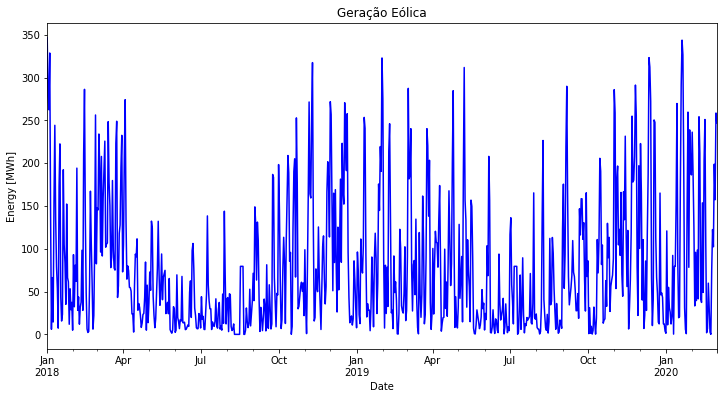

In [95]:
# display plot 
plt.figure(figsize = (12,6))
Energy.plot(title = 'Geração Eólica', color = 'blue')
plt.ylabel('Energy [MWh]')
plt.show()

### Fazer slicing dos dados 


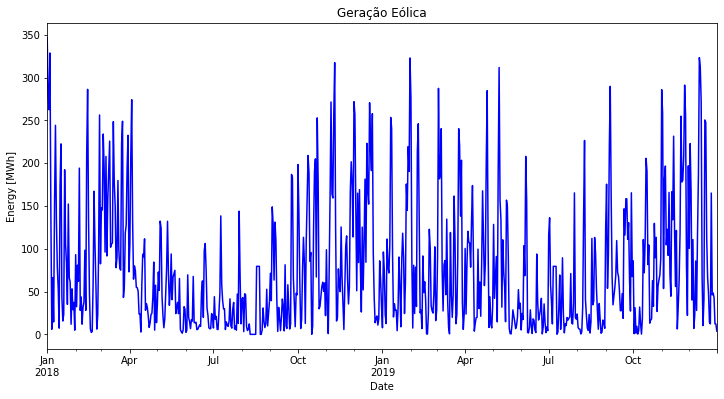

In [112]:
# Realizar Slice e separar somente uma parte dos dados (ate final de 2019)
final_2019 = 730
plt.figure(figsize = (12,6))
Energy[0:final_2019].plot(title = 'Geração Eólica', color = 'blue')
plt.ylabel('Energy [MWh]')
plt.show()

In [111]:
Energy[0:final_2019].tail()

Date
2019-12-27    48.44
2019-12-28    43.18
2019-12-29    12.30
2019-12-30    12.09
2019-12-31     3.79
Name: Energy(MWh), dtype: float64

##  Geração média por mês 

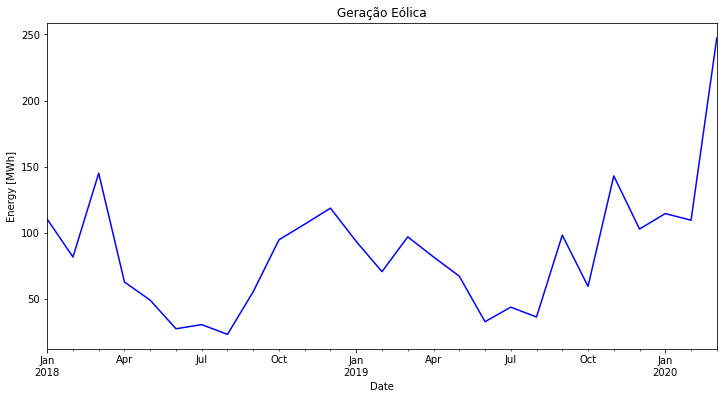

In [114]:
freq = 'M'
# Calcula a Geração média por mês 
media_energy_df = Energy.resample(freq).mean()

# Display média por mês 
plt.figure(figsize = (12,6))
media_energy_df.plot(title = 'Geração Eólica', color = 'blue')
plt.ylabel('Energy [MWh]')
plt.show()

## Geração média por semestre

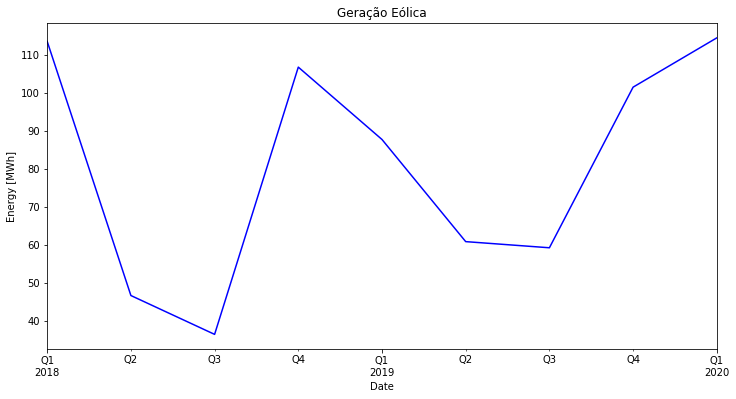

In [116]:
freq = 'Q'
# Calcula a Geração média por mês 
media_energy_df = Energy.resample(freq).mean()

# Display média por mês 
plt.figure(figsize = (12,6))
media_energy_df.plot(title = 'Geração Eólica', color = 'blue')
plt.ylabel('Energy [MWh]')
plt.show()

In [131]:
def make_time_series(energy_df, years, freq='D', start_idx=0, has_leap_year = None, leap_year = None):
    
    '''
    Cria um numero de series para cada ano na lista years
    ARG:
    energy_df(dataframe): O dataframe de geracao de energia eolica com data como index
    years(list): lista de anos para cada serie que sera criada. ex. ['2018', '2019']
    freq(string): A frequencia em que os dados serao analisados(D = diaria, M = Mensal...)
    start_indx(int): O index do primeiro ponto da primeira serie. 
    has_leap_year(binario): Binario que informa se a lista de anos possui um ano bissexto
    leap_year(int): Valor do ano bissexto
    
    RETURNS:
    time_series(list): lista com as time series para cada ano'''
    
    # grava as time series
    time_series = []
    
    if has_leap_year:
        # valor do ano bissexto
        leap = leap_year
    

    # Cria um time series para cada ano da lista years
    for i in range(len(years)):

        year = years[i]
        
        if has_leap_year:
            year == leap
            end_idx = start_idx+366
            
        else:
            end_idx = start_idx+365

        # Cria o inicio e o fim do nosso datetime
        t_start = year + '-01-01' # Primeiro de janeiro e nosso t_start (ou t0)
        t_end = year + '-12-31' # 31 de Dezembro e o t_end

        # Slicing nos dados de energia
        data = energy_df[start_idx:end_idx]

        # Cria time series para cada ano
        index = pd.date_range(start=t_start, end =t_end,  freq=freq)
        time_series.append(pd.Series(data=data, index=index))
        
        start_idx = end_idx
    
    # Retorna lista de time series
    return time_series

In [133]:
# Verificando a funcao
# Time series para cada ano
years = ['2018', '2019']

freq ='D' # frequencia diaria

# Cria time series
time_series = make_time_series(energy, years, freq=freq)

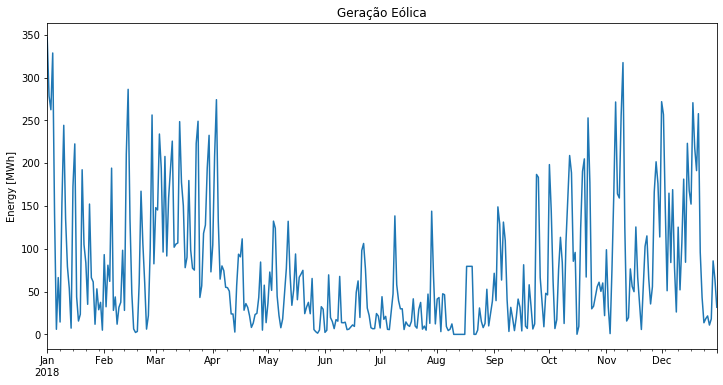

In [138]:
# Display primeira time series
time_series_idx = 0

plt.figure(figsize=(12,6))
time_series[time_series_idx].plot(title = 'Geração Eólica')
plt.ylabel('Energy [MWh]')
plt.show()

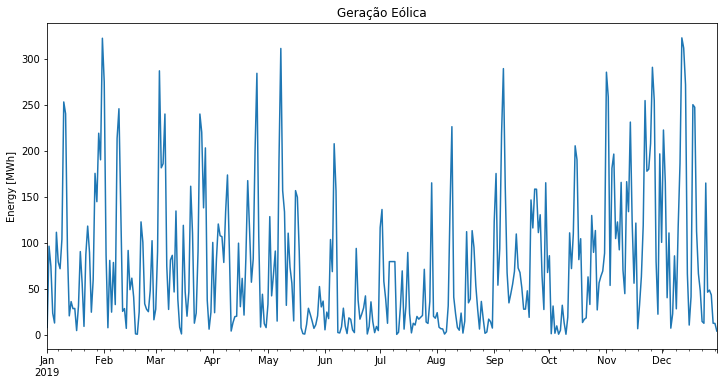

In [139]:
# Display segunda time series
time_series_idx = 1

plt.figure(figsize=(12,6))
time_series[time_series_idx].plot(title = 'Geração Eólica')
plt.ylabel('Energy [MWh]')
plt.show()